In [31]:
# Import libraries
import numpy as np
import pandas as pd
import re
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from difflib import get_close_matches
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Importing dataset
raw_data = pd.read_csv("Data/hindi_movies_dataset.csv")
raw_data.head(5)

,Unnamed: 0,movie_id,movie_name,year,genre,overview,director,cast
0,0,tt15354916,Jawan,2023,"Action, Thriller",A high-octane action thriller which outlines t...,Atlee,"Shah Rukh Khan, Nayanthara, Vijay Sethupathi, ..."
1,1,tt15748830,Jaane Jaan,2023,"Crime, Drama, Mystery",A single mother and her daughter who commit a ...,Sujoy Ghosh,"Kareena Kapoor, Jaideep Ahlawat, Vijay Varma, ..."
2,2,tt11663228,Jailer,2023,"Action, Comedy, Crime",A retired jailer goes on a manhunt to find his...,Nelson Dilipkumar,"Rajinikanth, Mohanlal, Shivarajkumar, Jackie S..."
3,3,tt14993250,Rocky Aur Rani Kii Prem Kahaani,2023,"Comedy, Drama, Family",Flamboyant Punjabi Rocky and intellectual Beng...,Karan Johar,"Ranveer Singh, Alia Bhatt, Dharmendra, Shabana..."
4,4,tt15732324,OMG 2,2023,"Comedy, Drama",An unhappy civilian asks the court to mandate ...,Amit Rai,"Pankaj Tripathi, Akshay Kumar, Yami Gautam, Pa..."


In [33]:
raw_data.describe()

,Unnamed: 0
count,2199.000000
mean,1099.369259
std,635.344495
min,0.000000
25%,549.500000
50%,1099.000000
75%,1649.500000
max,2199.000000


In [34]:
# Total number of data points and columns
raw_data.shape

(2199, 8)

In [35]:
raw_data.columns

Index(['Unnamed: 0', 'movie_id', 'movie_name', 'year', 'genre', 'overview',
       'director', 'cast'],
      dtype='object')

In [36]:
# checking if any duplicates
raw_data[raw_data.duplicated()]

,Unnamed: 0,movie_id,movie_name,year,genre,overview,director,cast


In [37]:
# Selecting usefull features
df = raw_data[['genre','movie_name','year','cast', 'director']]

In [38]:
# column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   genre       2199 non-null   object
 1   movie_name  2199 non-null   object
 2   year        2134 non-null   object
 3   cast        2199 non-null   object
 4   director    2199 non-null   object
dtypes: object(5)
memory usage: 86.0+ KB


In [39]:
df

,genre,movie_name,year,cast,director
0,"Action, Thriller",Jawan,2023,"Shah Rukh Khan, Nayanthara, Vijay Sethupathi, ...",Atlee
1,"Crime, Drama, Mystery",Jaane Jaan,2023,"Kareena Kapoor, Jaideep Ahlawat, Vijay Varma, ...",Sujoy Ghosh
2,"Action, Comedy, Crime",Jailer,2023,"Rajinikanth, Mohanlal, Shivarajkumar, Jackie S...",Nelson Dilipkumar
3,"Comedy, Drama, Family",Rocky Aur Rani Kii Prem Kahaani,2023,"Ranveer Singh, Alia Bhatt, Dharmendra, Shabana...",Karan Johar
4,"Comedy, Drama",OMG 2,2023,"Pankaj Tripathi, Akshay Kumar, Yami Gautam, Pa...",Amit Rai
...,...,...,...,...,...
2194,Thriller,Heeriye,NaN,"Shatrughan Sinha, Reena Roy, Ajit Khan, Premna...",Subhash Ghai
2195,"Drama, Musical, Romance",Sur: The Melody of Life,2002,"Lucky Ali, Simone Singh, Achint Kaur, Ehsan Khan",Tanuja Chandra
2196,"Musical, Romance",Time to Dance,2021,"Sooraj Pancholi, Isabelle Kaif, Waluscha D'Sou...",Stanley D'Costa
2197,"Drama, Family, Fantasy",Nigahen: Nagina Part II,1989,"Sunny Deol, Sridevi, Anupam Kher, Gulshan Grover",Harmesh Malhotra


In [40]:
# Ensure 'movie_name' column is of string type
df['movie_name'] = df['movie_name'].astype(str)

In [41]:
# Optional: Check if the conversion was successful
print(df['movie_name'].dtype)  # Should output: object

object


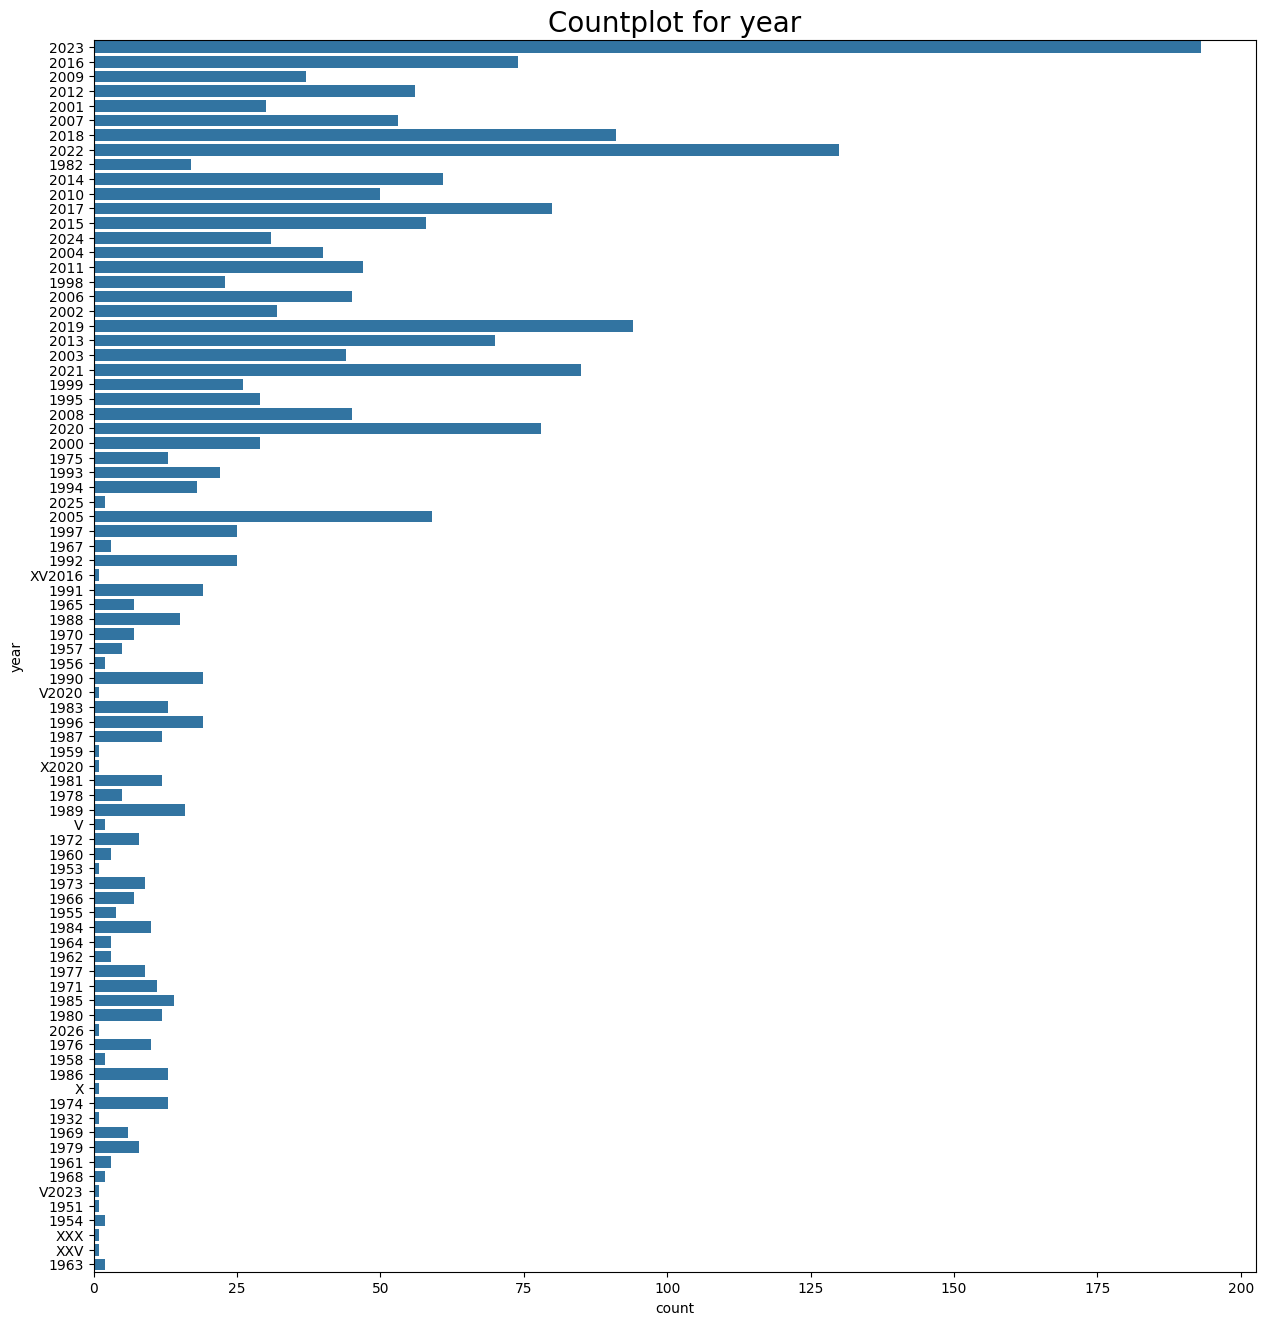

In [42]:
plt.figure(figsize=[15,16])
sns.countplot(data=df, y='year')
plt.title('Countplot for year', fontsize = 20)
plt.show()

In [43]:
# Now we are not using year column also
df = df.drop("year", axis=1)

In [44]:
# Cheking null values
df.isna().sum()

genre         0
movie_name    0
cast          0
director      0
dtype: int64

In [45]:
# Filing nan value with blank string
df['genre'] = df['genre'].replace(np.nan," ")
df['cast'] = df['cast'].replace(np.nan," ")
df['director'] = df['director'].replace(np.nan," ")

In [74]:
#tmdb = TMDb()
# tmdb.api_key = 'a8f3c31b4bc4c4de56e1affe22e456ff'

# importing tmdb
from tmdbv3api import TMDb,Movie
import json
import requests #for making HTTP requests

# Creating TMDB Api Object
tmdb = TMDb()
# tmdb.api_key = 'a8f3c31b4bc4c4de56e1affe22e456ff'
tmdb.api_key = 'c6c09d114effb5caac5eba5a761473a2'
tmdb_movie = Movie()

def get_movie_details(title):
    try:
        title = str(title).strip()
        result = tmdb_movie.search(title)
        if result:
            movie_id = result[0].id
            response = requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={tmdb.api_key}')
            data_json = response.json()
            
            # Fetching movie genre
            movie_genres = [str(genre.get('name', '')) for genre in data_json.get('genres', [])]
            genre = ", ".join(movie_genres)
            
            # Fetching vote average and vote count
            vote_average = data_json.get('vote_average', np.nan)
            vote_count = data_json.get('vote_count', np.nan)
        else:
            genre, vote_average, vote_count = "", np.nan, np.nan
    except Exception as e:
        print(f"Error processing {title}: {e}")
        genre, vote_average, vote_count = "", np.nan, np.nan
    
    return genre, vote_average, vote_count




In [75]:
# Apply the function to get movie details
tqdm.pandas()

In [78]:
def apply_get_movie_details(row):
    title = row['movie_name']
    genre, vote_average, vote_count = get_movie_details(title)
    return pd.Series({'TMDB_Genre': genre, 'Vote_Average': vote_average, 'Vote_Count': vote_count})


In [79]:
# df['movie_name'] = df['movie_name'].astype(str)

In [80]:
# Use progress_apply to show a progress bar
df[['TMDB_Genre', 'Vote_Average', 'Vote_Count']] = df.progress_apply(apply_get_movie_details, axis=1)

  6%|▋         | 140/2199 [00:08<01:57, 17.47it/s]

Error processing Bye2: attribute name must be string, not 'int'


 10%|█         | 222/2199 [00:12<01:36, 20.44it/s]

Error processing Jalpari: The Desert Mermaid: attribute name must be string, not 'int'


 14%|█▎        | 298/2199 [00:16<01:33, 20.30it/s]

Error processing Don 3: The Final Chapter: attribute name must be string, not 'int'


 15%|█▌        | 338/2199 [00:20<02:36, 11.90it/s]

Error processing Untitled Vikas Bahl/Jio Studios Project: attribute name must be string, not 'int'


 19%|█▊        | 411/2199 [00:56<20:22,  1.46it/s]

Error processing Malang - Unleash the Madness: attribute name must be string, not 'int'


 26%|██▌       | 565/2199 [02:52<18:51,  1.44it/s]

Error processing Untitled Blumhouse Productions Film: attribute name must be string, not 'int'


 26%|██▌       | 573/2199 [02:58<19:29,  1.39it/s]

Error processing Untitled Aamir khan/Rajkumar Hirani movie: attribute name must be string, not 'int'


 27%|██▋       | 597/2199 [03:15<15:30,  1.72it/s]

Error processing Khuda Haafiz Chapter II: Agni Pariksha: attribute name must be string, not 'int'


 32%|███▏      | 701/2199 [04:33<16:04,  1.55it/s]

Error processing Untitled Soorarai Pottru remake: attribute name must be string, not 'int'


 32%|███▏      | 704/2199 [04:34<14:56,  1.67it/s]

Error processing Aashiq Banaya Aapne: Love Takes Over: attribute name must be string, not 'int'


 37%|███▋      | 810/2199 [05:54<13:21,  1.73it/s]

Error processing Untitled Shahid Kapoor/Kriti Sanon Film: attribute name must be string, not 'int'


 37%|███▋      | 824/2199 [06:04<14:20,  1.60it/s]

Error processing Shah Behram: attribute name must be string, not 'int'


 39%|███▊      | 850/2199 [06:23<15:03,  1.49it/s]

Error processing Koochie Koochie Hota Hai: attribute name must be string, not 'int'


 39%|███▉      | 860/2199 [06:30<13:58,  1.60it/s]

Error processing Sorry Karma Returns: attribute name must be string, not 'int'


 41%|████▏     | 910/2199 [07:09<15:30,  1.39it/s]

Error processing Ghost Story - An Abstract Film: attribute name must be string, not 'int'


 43%|████▎     | 939/2199 [07:31<14:59,  1.40it/s]

Error processing Brahmastra 2: attribute name must be string, not 'int'


 45%|████▍     | 980/2199 [08:01<12:12,  1.66it/s]

Error processing My Friend Ganesha 4: attribute name must be string, not 'int'


 46%|████▌     | 1014/2199 [08:27<14:03,  1.40it/s]

Error processing Vaastav: The Reality: attribute name must be string, not 'int'


 47%|████▋     | 1025/2199 [08:34<11:09,  1.75it/s]

Error processing Waqt: The Race Against Time: attribute name must be string, not 'int'


 48%|████▊     | 1057/2199 [08:57<12:28,  1.52it/s]

Error processing Shaurya: It Takes Courage to Make Right... Right: attribute name must be string, not 'int'


 48%|████▊     | 1065/2199 [09:03<12:52,  1.47it/s]

Error processing Kaala Barbarian Chapter 1: attribute name must be string, not 'int'


 49%|████▉     | 1074/2199 [09:10<12:17,  1.52it/s]

Error processing Dil Aashna Hai (...The Heart Knows): attribute name must be string, not 'int'


 51%|█████     | 1125/2199 [09:47<11:25,  1.57it/s]

Error processing Ek Betuke Aadmi Ki Afrah Raatein: attribute name must be string, not 'int'


 51%|█████▏    | 1129/2199 [09:50<12:27,  1.43it/s]

Error processing Badla Sherni Ka: attribute name must be string, not 'int'


 51%|█████▏    | 1130/2199 [09:50<10:24,  1.71it/s]

Error processing Awara Pagal Deewana 2: attribute name must be string, not 'int'


 53%|█████▎    | 1176/2199 [10:25<13:17,  1.28it/s]

Error processing Auron Mein Kahan DumTha: attribute name must be string, not 'int'


 54%|█████▍    | 1196/2199 [10:42<12:21,  1.35it/s]

Error processing Bhaagamathie Full Hindi Dubbed Movie: attribute name must be string, not 'int'


 56%|█████▌    | 1235/2199 [11:12<10:34,  1.52it/s]

Error processing Acting Ka Bhoot: attribute name must be string, not 'int'


 58%|█████▊    | 1274/2199 [11:41<09:51,  1.56it/s]

Error processing Untitled SRK-Suhana-Marflix movie: attribute name must be string, not 'int'


 58%|█████▊    | 1284/2199 [11:49<10:30,  1.45it/s]

Error processing Kadhalar Dinam: attribute name must be string, not 'int'


 59%|█████▊    | 1291/2199 [11:53<08:28,  1.79it/s]

Error processing Chimanee Pakhre: attribute name must be string, not 'int'


 59%|█████▉    | 1297/2199 [11:57<08:33,  1.76it/s]

Error processing 21: Battle of Saragarhi: attribute name must be string, not 'int'


 60%|██████    | 1325/2199 [12:17<09:28,  1.54it/s]

Error processing Jaan-E-Mann: Let's Fall in Love... Again: attribute name must be string, not 'int'


 61%|██████    | 1331/2199 [12:21<08:46,  1.65it/s]

Error processing Iftikhar: attribute name must be string, not 'int'


 61%|██████▏   | 1349/2199 [12:35<08:28,  1.67it/s]

Error processing Raktneeti: attribute name must be string, not 'int'


 62%|██████▏   | 1367/2199 [12:48<08:36,  1.61it/s]

Error processing Sheela I Love You: attribute name must be string, not 'int'


 63%|██████▎   | 1379/2199 [12:57<09:13,  1.48it/s]

Error processing Daku Ramkali: attribute name must be string, not 'int'


 63%|██████▎   | 1381/2199 [12:58<08:32,  1.59it/s]

Error processing Mudrank: The Stamp: attribute name must be string, not 'int'


 67%|██████▋   | 1467/2199 [14:03<07:35,  1.61it/s]

Error processing Long Live Brij Mohan: attribute name must be string, not 'int'


 68%|██████▊   | 1488/2199 [14:18<07:24,  1.60it/s]

Error processing Indian Never Again Nirbhaya: attribute name must be string, not 'int'


 68%|██████▊   | 1490/2199 [14:20<06:51,  1.72it/s]

Error processing Chaar Lugaai: attribute name must be string, not 'int'


 69%|██████▉   | 1515/2199 [14:39<07:15,  1.57it/s]

Error processing Aankhen 2: attribute name must be string, not 'int'


 70%|███████   | 1543/2199 [15:01<07:19,  1.49it/s]

Error processing Fraud Saiyyan: attribute name must be string, not 'int'


 71%|███████   | 1561/2199 [15:13<06:04,  1.75it/s]

Error processing Ghatak: Lethal: attribute name must be string, not 'int'


 73%|███████▎  | 1600/2199 [15:45<06:06,  1.64it/s]

Error processing Jungle Ki Hasina: attribute name must be string, not 'int'


 74%|███████▎  | 1618/2199 [15:58<06:26,  1.50it/s]

Error processing Baap Beti: attribute name must be string, not 'int'


 75%|███████▍  | 1647/2199 [16:20<06:04,  1.52it/s]

Error processing Dec-24: attribute name must be string, not 'int'


 78%|███████▊  | 1719/2199 [17:13<05:04,  1.57it/s]

Error processing Balakot: the true story: attribute name must be string, not 'int'


 79%|███████▉  | 1740/2199 [17:30<08:04,  1.05s/it]

Error processing ANOLB: attribute name must be string, not 'int'


 80%|███████▉  | 1752/2199 [17:39<04:46,  1.56it/s]

Error processing Sandai Kozhi: attribute name must be string, not 'int'


 80%|███████▉  | 1759/2199 [17:43<04:08,  1.77it/s]

Error processing Sheela Meri Jaan: attribute name must be string, not 'int'


 80%|████████  | 1764/2199 [17:47<04:15,  1.70it/s]

Error processing Jawani Ki Kahani: attribute name must be string, not 'int'


 81%|████████▏ | 1787/2199 [18:04<04:37,  1.49it/s]

Error processing Junglee Tarzan: attribute name must be string, not 'int'


 82%|████████▏ | 1802/2199 [18:14<03:31,  1.88it/s]

Error processing Daud: Fun on the Run: attribute name must be string, not 'int'


 82%|████████▏ | 1810/2199 [18:20<03:39,  1.77it/s]

Error processing Tum Bin...: Love Will Find a Way: attribute name must be string, not 'int'


 83%|████████▎ | 1817/2199 [18:25<03:46,  1.69it/s]

Error processing Apno Se Bewafai: attribute name must be string, not 'int'


 83%|████████▎ | 1823/2199 [18:28<03:33,  1.76it/s]

Error processing Pyasa Darinda: attribute name must be string, not 'int'


 83%|████████▎ | 1830/2199 [18:34<05:09,  1.19it/s]

Error processing Tom Dick and Harry Returns: attribute name must be string, not 'int'


 84%|████████▎ | 1838/2199 [18:40<03:44,  1.61it/s]

Error processing Bhuddah Hoga Tera Baap: attribute name must be string, not 'int'


 84%|████████▍ | 1857/2199 [18:52<03:12,  1.78it/s]

Error processing Bade Achhe Lagte Hai: attribute name must be string, not 'int'


 85%|████████▌ | 1875/2199 [19:05<03:14,  1.66it/s]

Error processing Mystery of the Tattoo: attribute name must be string, not 'int'


 86%|████████▌ | 1885/2199 [19:12<03:25,  1.53it/s]

Error processing Hari Singh Nalwa - Champion of the Khalsa Ji: attribute name must be string, not 'int'


 87%|████████▋ | 1918/2199 [19:36<03:13,  1.45it/s]

Error processing Badmaash Babes: attribute name must be string, not 'int'


 88%|████████▊ | 1930/2199 [19:43<02:40,  1.68it/s]

Error processing Ayee Milan Ki Raat: attribute name must be string, not 'int'


 88%|████████▊ | 1937/2199 [19:48<02:35,  1.68it/s]

Error processing Crook: It's Good to Be Bad: attribute name must be string, not 'int'


 88%|████████▊ | 1943/2199 [19:52<02:24,  1.77it/s]

Error processing Mumbai Express: attribute name must be string, not 'int'


 89%|████████▉ | 1968/2199 [20:09<02:12,  1.75it/s]

Error processing Juliet's X-Tape: attribute name must be string, not 'int'


 92%|█████████▏| 2013/2199 [20:50<02:00,  1.54it/s]

Error processing The Death Sentence: Mrityu Dand: attribute name must be string, not 'int'


 92%|█████████▏| 2014/2199 [20:50<01:47,  1.71it/s]

Error processing The Fighter Suman: attribute name must be string, not 'int'


 92%|█████████▏| 2020/2199 [20:54<01:35,  1.87it/s]

Error processing Albert Pinto Ko Gussa Kyon Ata Hai: attribute name must be string, not 'int'


 92%|█████████▏| 2024/2199 [20:56<01:46,  1.64it/s]

Error processing Testing Movie1: attribute name must be string, not 'int'


 92%|█████████▏| 2028/2199 [20:59<01:45,  1.62it/s]

Error processing Teri Khata: attribute name must be string, not 'int'


 94%|█████████▍| 2071/2199 [21:30<01:25,  1.50it/s]

Error processing M.... Matric Pass: attribute name must be string, not 'int'


 94%|█████████▍| 2076/2199 [21:34<01:17,  1.58it/s]

Error processing Boyfriend.com: attribute name must be string, not 'int'


 95%|█████████▍| 2080/2199 [21:36<01:08,  1.74it/s]

Error processing School Romance: Pure Love Web Series: attribute name must be string, not 'int'


 96%|█████████▌| 2115/2199 [22:04<00:53,  1.56it/s]

Error processing Tadapti Jawani: attribute name must be string, not 'int'


 97%|█████████▋| 2128/2199 [22:12<00:49,  1.43it/s]

Error processing Millitary Raaj: attribute name must be string, not 'int'


 98%|█████████▊| 2150/2199 [22:28<00:27,  1.75it/s]

Error processing Shlok - The Desi Sherlock: attribute name must be string, not 'int'


 98%|█████████▊| 2155/2199 [22:31<00:27,  1.58it/s]

Error processing Tute Khwab: attribute name must be string, not 'int'


 98%|█████████▊| 2165/2199 [22:38<00:22,  1.52it/s]

Error processing Mutamestri: attribute name must be string, not 'int'


 99%|█████████▊| 2168/2199 [22:40<00:18,  1.72it/s]

Error processing Shikari: The Hunter: attribute name must be string, not 'int'


 99%|█████████▉| 2178/2199 [22:46<00:09,  2.13it/s]

Error processing Untitled Ranveer Singh & Shankar Film: attribute name must be string, not 'int'


100%|█████████▉| 2196/2199 [22:59<00:01,  1.52it/s]

Error processing Heeriye: attribute name must be string, not 'int'


100%|██████████| 2199/2199 [23:02<00:00,  1.59it/s]


In [81]:

# Save to CSV
df.to_csv('Hindi_Movies_Dataset_with_TMDB.csv', index=False)

In [82]:
df.rename(columns={
    'movie_name': 'Title',
    'cast': 'Cast and crew',
    'TMDB_Genre': 'Genre',
    'Vote_Average': 'Vote_Average',
    'Vote_Count': 'Vote_Count'
}, inplace=True)


In [83]:
wiki_df2 = df[["Title", "Cast and crew", "Genre", "Vote_Average", "Vote_Count"]]


In [85]:
wiki_df2.head()



,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,Jawan,"Shah Rukh Khan, Nayanthara, Vijay Sethupathi, ...","Action, Adventure, Thriller",7.200,225.0
1,Jaane Jaan,"Kareena Kapoor, Jaideep Ahlawat, Vijay Varma, ...","Crime, Thriller, Drama",7.100,80.0
2,Jailer,"Rajinikanth, Mohanlal, Shivarajkumar, Jackie S...",,0.000,0.0
3,Rocky Aur Rani Kii Prem Kahaani,"Ranveer Singh, Alia Bhatt, Dharmendra, Shabana...","Comedy, Drama, Family, Romance",6.125,48.0
4,OMG 2,"Pankaj Tripathi, Akshay Kumar, Yami Gautam, Pa...","Comedy, Drama",7.300,41.0


In [86]:
# Checking missing value
wiki_df2[wiki_df2.isna().any(axis=1)]

,Title,Cast and crew,Genre,Vote_Average,Vote_Count
135,Bye2,"Bhushan, Karan, Vipin Singh, Shreya Tyagi",,NaN,NaN
218,Jalpari: The Desert Mermaid,"Lehar Khan, Krishang Trivedi, Parvin Dabas, Su...",,NaN,NaN
294,Don 3: The Final Chapter,Ranveer Singh,,NaN,NaN
335,Untitled Vikas Bahl/Jio Studios Project,"Ajay Devgn, Madhavan, Janki Bodiwala, Jyotika",,NaN,NaN
409,Malang - Unleash the Madness,"Aditya Roy Kapoor, Anil Kapoor, Disha Patani, ...",,NaN,NaN
...,...,...,...,...,...
2153,Tute Khwab,"Pramod Sharma, Dhanashri Rathod, Mahesh Kumar,...",,NaN,NaN
2163,Mutamestri,"Chiranjeevi, Meena, Roja, Sharat Saxena",,NaN,NaN
2166,Shikari: The Hunter,"Mithun Chakraborty, Naseeruddin Shah, Irina Ku...",,NaN,NaN
2176,Untitled Ranveer Singh & Shankar Film,Ranveer Singh,,NaN,NaN


In [87]:
wiki_df2 =  wiki_df2.fillna({'Genre':'', 'Vote_Average':0,'Vote_Count':0})


In [88]:
wiki_df2 =  wiki_df2.fillna({'Title':'', 'Cast and crew':''})

In [89]:
wiki_df2[wiki_df2.isna().any(axis=1)]

,Title,Cast and crew,Genre,Vote_Average,Vote_Count


In [90]:
# Cheking random row values of cast and crew column.
sent_1 = wiki_df2['Cast and crew'][1]
sent_2 = wiki_df2['Cast and crew'][55]
sent_3 = wiki_df2['Cast and crew'][42]
sent_4 = wiki_df2['Cast and crew'][88]
sent_5 = wiki_df2['Cast and crew'][500]
print(sent_1)
print("====================================")
print(sent_2)
print("====================================")
print(sent_3)
print("====================================")
print(sent_4)
print("====================================")
print(sent_5)

Kareena Kapoor, Jaideep Ahlawat, Vijay Varma, Saurabh Sachdeva
Adah Sharma, Yogita Bihani, Sonia Balani, Siddhi Idnani
Bhumi Pednekar, Dolly Ahluwalia, Shibani Bedi, Saloni Daini
Tamannaah Bhatia, Vijay Varma, Neena Gupta, Mrunal Thakur
Hrithik Roshan, Kiara Advani, N.T. Rama Rao Jr.


In [91]:
# Text Preprocessing.
preprocessed = []
for sentance in wiki_df2['Cast and crew'].values:
    
    # convert all uppercase string into lowercase
    sentance = sentance.lower()
    
    # removing specific keywords
    sentance = re.sub(r"director","", sentance)
    sentance = re.sub(r"co-director/screenplay","", sentance)
    sentance = re.sub(r"co-/screenplay","", sentance)
    sentance = re.sub(r"screenplay","", sentance)
    sentance = re.sub(r"director/screenplay","", sentance)
    
    # removing special symbol
    sentance = re.sub('[^A-Za-z]+', ' ', sentance) 
    
    # removing extra space
    sentance = re.sub(' +', ' ', sentance) 
    
    # tokenizing the review by words
    sentance = sentance.split() 
    sentance = ' '.join(sentance)
    
    # creating a corpus
    preprocessed.append(sentance)
    
wiki_df2["Cast and crew"] = preprocessed


In [92]:
# Now again check random row values of cast and crew column after cleaning.
sent_1 = wiki_df2['Cast and crew'][1]
sent_2 = wiki_df2['Cast and crew'][55]
sent_3 = wiki_df2['Cast and crew'][42]
sent_4 = wiki_df2['Cast and crew'][88]
sent_5 = wiki_df2['Cast and crew'][500]
sent_6 = wiki_df2['Cast and crew'][605]
print(sent_1)
print("====================================")
print(sent_2)
print("====================================")
print(sent_3)
print("====================================")
print(sent_4)
print("====================================")
print(sent_5)
print("====================================")
print(sent_6)
print("====================================")

kareena kapoor jaideep ahlawat vijay varma saurabh sachdeva
adah sharma yogita bihani sonia balani siddhi idnani
bhumi pednekar dolly ahluwalia shibani bedi saloni daini
tamannaah bhatia vijay varma neena gupta mrunal thakur
hrithik roshan kiara advani n t rama rao jr
irrfan khan saba qamar dishita sehgal deepak dobriyal


In [93]:
wiki_df2.head()

,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,Jawan,shah rukh khan nayanthara vijay sethupathi dee...,"Action, Adventure, Thriller",7.200,225.0
1,Jaane Jaan,kareena kapoor jaideep ahlawat vijay varma sau...,"Crime, Thriller, Drama",7.100,80.0
2,Jailer,rajinikanth mohanlal shivarajkumar jackie shroff,,0.000,0.0
3,Rocky Aur Rani Kii Prem Kahaani,ranveer singh alia bhatt dharmendra shabana azmi,"Comedy, Drama, Family, Romance",6.125,48.0
4,OMG 2,pankaj tripathi akshay kumar yami gautam pawan...,"Comedy, Drama",7.300,41.0


In [94]:
# Text Preprocessing on movie genre column
preprocessed = []
for sentance in wiki_df2['Genre'].values:
    
    # convert all uppercase string into lowercase
    sentance = sentance.lower()
    
    # removing special symbol
    sentance = re.sub('[^A-Za-z]+', ' ', sentance) 
    
    # removing extra space
    sentance = re.sub(' +', ' ', sentance) 
    
    # tokenizing the review by words
    sentance = sentance.split() 
    sentance = ' '.join(sentance)
    
    # This line adds the cleaned and processed genre string to the preprocessed list.

    preprocessed.append(sentance) # Update the 'Genre' column with the preprocessed data:
    
wiki_df2["Genre"] = preprocessed

In [95]:
wiki_df2.head()

,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,Jawan,shah rukh khan nayanthara vijay sethupathi dee...,action adventure thriller,7.200,225.0
1,Jaane Jaan,kareena kapoor jaideep ahlawat vijay varma sau...,crime thriller drama,7.100,80.0
2,Jailer,rajinikanth mohanlal shivarajkumar jackie shroff,,0.000,0.0
3,Rocky Aur Rani Kii Prem Kahaani,ranveer singh alia bhatt dharmendra shabana azmi,comedy drama family romance,6.125,48.0
4,OMG 2,pankaj tripathi akshay kumar yami gautam pawan...,comedy drama,7.300,41.0


In [96]:

# Text Preprocessing on title column
preprocessed = []
for sentance in wiki_df2['Title'].values:
    
    # convert all uppercase string into lowercase
    sentance = sentance.lower()
       
    # removing extra space
    sentance = re.sub(' +', ' ', sentance) 
    
    # tokenizing the review by words
    sentance = sentance.split() 
    sentance = ' '.join(sentance)
    
    # creating a corpus
    preprocessed.append(sentance)
    
wiki_df2["Title"] = preprocessed

In [97]:
wiki_df2.head()

,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,jawan,shah rukh khan nayanthara vijay sethupathi dee...,action adventure thriller,7.200,225.0
1,jaane jaan,kareena kapoor jaideep ahlawat vijay varma sau...,crime thriller drama,7.100,80.0
2,jailer,rajinikanth mohanlal shivarajkumar jackie shroff,,0.000,0.0
3,rocky aur rani kii prem kahaani,ranveer singh alia bhatt dharmendra shabana azmi,comedy drama family romance,6.125,48.0
4,omg 2,pankaj tripathi akshay kumar yami gautam pawan...,comedy drama,7.300,41.0


In [98]:
df.head()


,genre,Title,Cast and crew,director,Genre,Vote_Average,Vote_Count
0,"Action, Thriller",Jawan,"Shah Rukh Khan, Nayanthara, Vijay Sethupathi, ...",Atlee,"Action, Adventure, Thriller",7.200,225.0
1,"Crime, Drama, Mystery",Jaane Jaan,"Kareena Kapoor, Jaideep Ahlawat, Vijay Varma, ...",Sujoy Ghosh,"Crime, Thriller, Drama",7.100,80.0
2,"Action, Comedy, Crime",Jailer,"Rajinikanth, Mohanlal, Shivarajkumar, Jackie S...",Nelson Dilipkumar,,0.000,0.0
3,"Comedy, Drama, Family",Rocky Aur Rani Kii Prem Kahaani,"Ranveer Singh, Alia Bhatt, Dharmendra, Shabana...",Karan Johar,"Comedy, Drama, Family, Romance",6.125,48.0
4,"Comedy, Drama",OMG 2,"Pankaj Tripathi, Akshay Kumar, Yami Gautam, Pa...",Amit Rai,"Comedy, Drama",7.300,41.0


In [101]:

# Combining cast and director columns
if 'cast' in df.columns and 'director' in df.columns:
    df["Cast and crew"] = df['cast'].astype(str) + ' ' + df['director'].astype(str)
else:
    print("Columns 'cast' and/or 'director' not found in DataFrame")

# Renaming columns if they exist in the DataFrame
rename_dict = {
    'original_title': 'Title',
    'genres': 'Genre',
    'vote_average': 'Vote_Average',
    'vote_count': 'Vote_Count'
}

for old_name, new_name in rename_dict.items():
    if old_name in df.columns:
        df.rename(columns={old_name: new_name}, inplace=True)
    else:
        print(f"Column '{old_name}' not found in DataFrame")

# Converting all specified string columns to lowercase if they exist
for col in ['Title', 'Cast and crew', 'Genre']:
    if col in df.columns:
        df[col] = df[col].str.lower()
    else:
        print(f"Column '{col}' not found in DataFrame")

# Re-arranging columns
required_columns = ['Title', 'Cast and crew', 'Genre', 'Vote_Average', 'Vote_Count']
if all(col in df.columns for col in required_columns):
    df = df[required_columns]
else:
    missing_cols = [col for col in required_columns if col not in df.columns]
    print(f"Missing columns in DataFrame: {missing_cols}")



Columns 'cast' and/or 'director' not found in DataFrame
Column 'original_title' not found in DataFrame
Column 'genres' not found in DataFrame
Column 'vote_average' not found in DataFrame
Column 'vote_count' not found in DataFrame


In [102]:
df.head()

,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,jawan,"shah rukh khan, nayanthara, vijay sethupathi, ...","action, adventure, thriller",7.200,225.0
1,jaane jaan,"kareena kapoor, jaideep ahlawat, vijay varma, ...","crime, thriller, drama",7.100,80.0
2,jailer,"rajinikanth, mohanlal, shivarajkumar, jackie s...",,0.000,0.0
3,rocky aur rani kii prem kahaani,"ranveer singh, alia bhatt, dharmendra, shabana...","comedy, drama, family, romance",6.125,48.0
4,omg 2,"pankaj tripathi, akshay kumar, yami gautam, pa...","comedy, drama",7.300,41.0


In [103]:
# Now combine both main and wiki_df2 dataframe into one
frame = [wiki_df2,df]
final_df = pd.concat(frame).reset_index(drop=True) 

In [104]:
final_df.head()

,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,jawan,shah rukh khan nayanthara vijay sethupathi dee...,action adventure thriller,7.200,225.0
1,jaane jaan,kareena kapoor jaideep ahlawat vijay varma sau...,crime thriller drama,7.100,80.0
2,jailer,rajinikanth mohanlal shivarajkumar jackie shroff,,0.000,0.0
3,rocky aur rani kii prem kahaani,ranveer singh alia bhatt dharmendra shabana azmi,comedy drama family romance,6.125,48.0
4,omg 2,pankaj tripathi akshay kumar yami gautam pawan...,comedy drama,7.300,41.0


# ML MODEL DEVELOPMENT


In [105]:
# Selecting feature which is needed to build a simple popularity based recomandation
p_df = final_df[['Title', 'Vote_Average', 'Vote_Count']]
p_df.head()

,Title,Vote_Average,Vote_Count
0,jawan,7.200,225.0
1,jaane jaan,7.100,80.0
2,jailer,0.000,0.0
3,rocky aur rani kii prem kahaani,6.125,48.0
4,omg 2,7.300,41.0


In [106]:
# calculating all the components based IMDB formula
v= p_df['Vote_Count']
R= p_df['Vote_Average']
C= p_df['Vote_Average'].mean()
m= p_df['Vote_Count'].quantile(0.70)

p_df['Weighted_Average']=((R*v)+ (C*m))/(v+m)


In [109]:
def get_unique_sorted_movies(df, sort_by='Weighted_Average'):
    """
    This function sorts the DataFrame by the specified column and removes duplicate titles.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing movie data.
    sort_by (str): Column name to sort by. Default is 'Weighted_Average'.
    
    Returns:
    pd.DataFrame: Sorted DataFrame with unique movie titles.
    """
    # Ensure the DataFrame contains the necessary columns
    if 'Title' not in df.columns or sort_by not in df.columns:
        raise ValueError(f"DataFrame must contain 'Title' and '{sort_by}' columns")

    # Sort the DataFrame by the specified column
    sorted_df = df.sort_values(by=sort_by, ascending=False)

    # Remove duplicates based on the Title column, keeping the first occurrence
    unique_sorted_df = sorted_df.drop_duplicates(subset='Title', keep='first')

    return unique_sorted_df

In [110]:
popular_movies = get_unique_sorted_movies(p_df, sort_by='Weighted_Average')

In [111]:
popular_movies.head(10)

,Title,Vote_Average,Vote_Count,Weighted_Average
111,dilwale dulhania le jayenge,8.537,4403.0,8.508555
1372,city lights,8.287,2090.0,8.232101
751,joker,8.160,24831.0,8.155496
2192,taxi driver,8.150,11904.0,8.140653
2211,lion,8.071,6426.0,8.054197
236,dream girl,8.238,507.0,8.027058
2570,new york,8.121,1070.0,8.021255
38,my name is khan,8.038,1270.0,7.955918
10,3 idiots,7.997,2301.0,7.951765
3078,aks,7.948,4054.0,7.922598


In [112]:
# Save preprocessed data
p_df.to_csv('preprocessed_movies_hindi.csv', index=False)
popular_movies.head(10).to_csv('top_10_popular_movies_hindi.csv', index=False)

In [113]:
final_df.head()

,Title,Cast and crew,Genre,Vote_Average,Vote_Count
0,jawan,shah rukh khan nayanthara vijay sethupathi dee...,action adventure thriller,7.200,225.0
1,jaane jaan,kareena kapoor jaideep ahlawat vijay varma sau...,crime thriller drama,7.100,80.0
2,jailer,rajinikanth mohanlal shivarajkumar jackie shroff,,0.000,0.0
3,rocky aur rani kii prem kahaani,ranveer singh alia bhatt dharmendra shabana azmi,comedy drama family romance,6.125,48.0
4,omg 2,pankaj tripathi akshay kumar yami gautam pawan...,comedy drama,7.300,41.0


## 2. Content Based Recommender

In [114]:
# concatinate all these columns and create one seprate column for them
final_df['Combined_Features'] = final_df['Cast and crew'] +' '+ final_df['Genre']

In [115]:
final_df['Combined_Features'].head()

0    shah rukh khan nayanthara vijay sethupathi dee...
1    kareena kapoor jaideep ahlawat vijay varma sau...
2    rajinikanth mohanlal shivarajkumar jackie shroff 
3    ranveer singh alia bhatt dharmendra shabana az...
4    pankaj tripathi akshay kumar yami gautam pawan...
Name: Combined_Features, dtype: object

In [116]:
# Create count matrix from this new combined column
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
count_matrix = cv.fit_transform(final_df["Combined_Features"])

In [117]:
# Now Compute the Cosine Similarity based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(count_matrix)

In [120]:
# # This Function takes movie title as input and return 15 most similar movies.
# # This function is also capable for correcting user input spell.


def get_recomandation_contentBase(title):
    # Converting uppercase into lower - ensure case-insensitive matching
    title = title.lower()
    
    # Correcting user input spell (close match from our movie list) - also ensures spell checking
    close_matches = get_close_matches(title, final_df['Title'].str.lower().values, n=1, cutoff=0.6)
    if not close_matches:
        return "No close matches found."
    
    title = close_matches[0]
    
    # Get the index of the movie that matches the title
    idx = final_df['Title'].str.lower()[final_df['Title'].str.lower() == title].index[0]
    
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the 15 most similar movies, excluding the input movie
    sim_scores = [x for x in sim_scores if x[0] != idx][:15]
    
    # Ensure unique movie titles in the recommendations
    seen_titles = set()
    unique_recommendations = []
    for i in sim_scores:
        movie_index = i[0]
        movie_title = final_df['Title'].iloc[movie_index]
        if movie_title not in seen_titles:
            seen_titles.add(movie_title)
            unique_recommendations.append(movie_title)
    
    for movie in unique_recommendations:
        print(movie)

In [121]:
# Now lets make predictions like 
get_recomandation_contentBase("Zindagi Na Milegi Dobara")

zindagi na milegi dobara
namastey london
dev.d
mujhse dosti karoge!
mere brother ki dulhan
honeymoon travels pvt. ltd.
na tum jaano na hum
the sky is pink
luck by chance


In [122]:
final_df.to_csv('final_movies_hindi.csv', index=False)

In [123]:
np.save('cosine_sim_bollywood.npy', cosine_sim)

## 3. Collaborative filtering